In [1]:
import numpy as np
np.random.choice([4, 5, 6], 10)

array([6, 6, 5, 6, 5, 6, 4, 6, 4, 5])

In [82]:
import functools
import collections
import time

def get_timing(func):
    t = time.time()
    func()
    return time.time() - t


def measure(n, times, values, sort_func):
    assert np.unique(values).shape[0] == len(values)
    timings = []
    for i in range(times):
        l = np.random.choice(values, n)
        t = get_timing(functools.partial(sort_func, l))
        timings.append(t)
    return timings


names =['quick','argsort',  'merge', 'heap', 'np.counting', 'counter', 'bincount']
methods = [np.sort, np.argsort, functools.partial(np.sort, kind='mergesort'),
           functools.partial(np.sort, kind='heapsort'),
           functools.partial(np.unique, return_counts=True),
           collections.Counter,
           np.bincount]

times = np.zeros(shape=(17, 10))
times_d = {}
for n in names:
    times_d[n] = times.copy()

for i in range(times.shape[0]):
    print(i)
    for k in range(1, times.shape[1]):
        for n, method in zip(names, methods):
            times_d[n][i, k] = np.average(measure(2 ** i, 100, range(2 * k), method))


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16


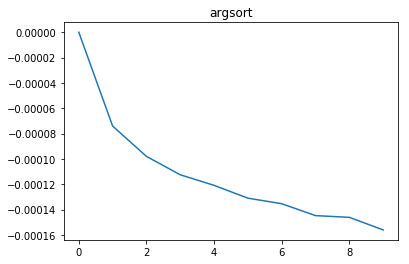

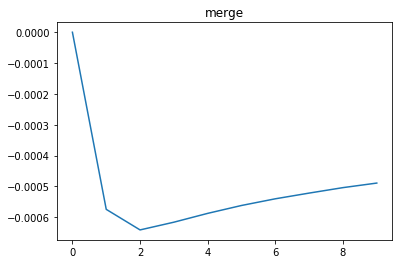

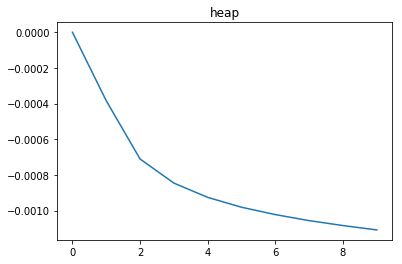

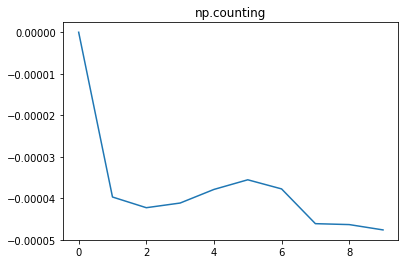

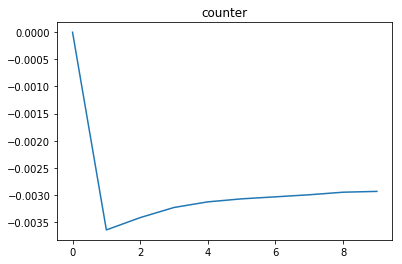

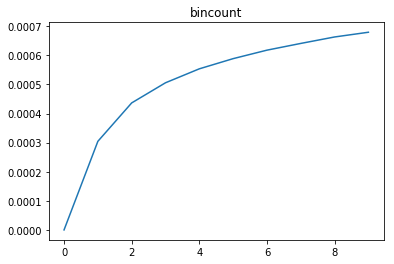

In [83]:
for n in names[1:]:
    plt.plot((times_d['quick'] - times_d[n])[15])
    plt.title(n)
    plt.show()

In [92]:
import pandas as pd
pd.DataFrame({'quick': times_d['quick'][15], 'bincount': times_d['bincount'][15]})

,quick,bincount
0,0.000000,0.000000
1,0.000351,0.000047
2,0.000475,0.000038
3,0.000542,0.000036
4,0.000590,0.000036
5,0.000625,0.000036
6,0.000654,0.000037
7,0.000677,0.000036
8,0.000700,0.000036
9,0.000716,0.000036


/home/rust/anaconda3/lib/python3.6/site-packages/matplotlib/axis.py:1086: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "
/home/rust/anaconda3/lib/python3.6/site-packages/matplotlib/axis.py:1096: UserWarning: Unable to find pixel distance along axis for interval padding of ticks; assuming no interval padding needed.
  warnings.warn("Unable to find pixel distance along axis "


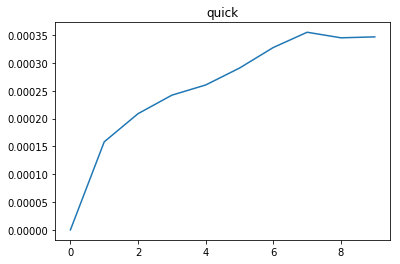

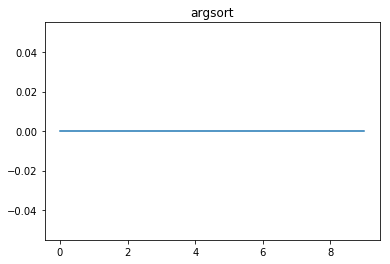

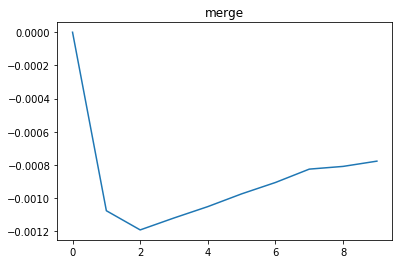

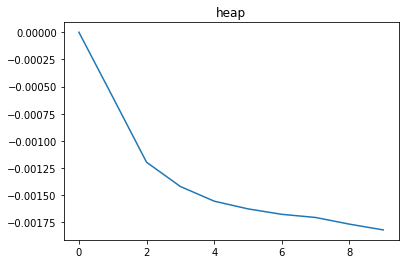

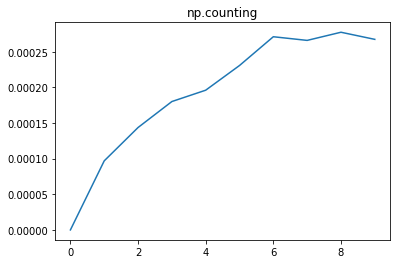

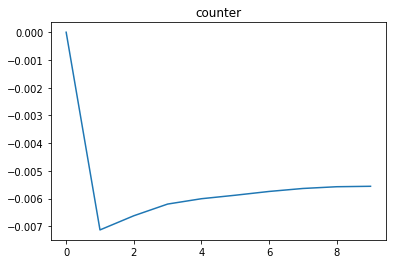

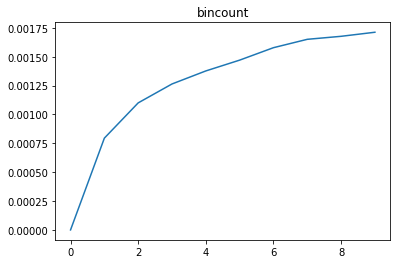

In [90]:
for n in names:
    plt.plot((times_d['argsort'] - times_d[n])[16])
    plt.title(n)
    plt.show()

In [68]:
np.cumsum([1, 2, 3])

array([1, 3, 6])

In [69]:
np.sort([2, 3, 4])

array([2, 3, 4])

In [71]:
np.arange(1, 10)

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [72]:
(np.array([0, 2, 3]) > 1) * 3

array([0, 3, 3])

In [76]:
np.array([[0, 1, 2, 3], [4, 5, 6, 7]])[np.array([2, 3]) != 34]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [78]:
z = np.zeros(shape=10)
z[np.array([1, 1])] += 1
z

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [81]:
np.bincount(np.array([1, 2, 3, 1, 0]))

array([1, 2, 1, 1])